In [2]:
from dotenv import load_dotenv
import os
load_dotenv('./.env')

True

In [23]:
from typing import Annotated, TypedDict 
from langgraph.graph import  StateGraph, START, END
from langgraph.graph.message import add_messages 
from langchain_ollama import ChatOllama

llm = ChatOllama(model="llama3.2:1b", base_url = "http://localhost:11434")

In [6]:
llm.invoke("hi")

AIMessage(content='How can I help you today?', additional_kwargs={}, response_metadata={'model': 'llama3.2:1b', 'created_at': '2025-01-26T09:55:51.300924Z', 'message': {'role': 'assistant', 'content': ''}, 'done_reason': 'stop', 'done': True, 'total_duration': 1296394958, 'load_duration': 580953208, 'prompt_eval_count': 26, 'prompt_eval_duration': 668000000, 'eval_count': 8, 'eval_duration': 46000000}, id='run-b9954073-2f9f-4fdd-8353-27800bf5cd82-0', usage_metadata={'input_tokens': 26, 'output_tokens': 8, 'total_tokens': 34})

In [24]:
class State(TypedDict):
    # {"messages": ["your message"]}
    messages: Annotated[list, add_messages]


def chatbot(state: State):
    response = llm.invoke(state["messages"])
    return {"messages": [response]}


graph_builder = StateGraph(State)
graph_builder.add_node("chatbot", chatbot)
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

graph = graph_builder.compile()

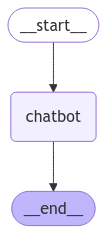

In [25]:
from IPython.display import display, Image
display(Image(graph.get_graph().draw_mermaid_png()))

In [26]:
graph.invoke({"messages": ["Hi", "myself is laxmi kant"]})

{'messages': [HumanMessage(content='Hi', additional_kwargs={}, response_metadata={}, id='3fc05fe3-b1d3-4448-b761-f64fbed33cef'),
  HumanMessage(content='myself is laxmi kant', additional_kwargs={}, response_metadata={}, id='93b7ad0d-3c57-48e0-bd15-6e1971777696'),
  AIMessage(content='Hello Laxmi Kant. What can I assist you with today?', additional_kwargs={}, response_metadata={'model': 'llama3.2:1b', 'created_at': '2025-01-26T10:17:11.114934Z', 'message': {'role': 'assistant', 'content': ''}, 'done_reason': 'stop', 'done': True, 'total_duration': 238085166, 'load_duration': 30675458, 'prompt_eval_count': 34, 'prompt_eval_duration': 113000000, 'eval_count': 15, 'eval_duration': 93000000}, id='run-d536696a-0a76-4181-8a43-984edd1ace24-0', usage_metadata={'input_tokens': 34, 'output_tokens': 15, 'total_tokens': 49})]}

In [27]:
graph.invoke({"messages": ["Hello"]})

{'messages': [HumanMessage(content='Hello', additional_kwargs={}, response_metadata={}, id='9fdf73ae-d852-4e3b-89cc-a62fd1b8d11b'),
  AIMessage(content='Hello. Is there something I can help you with or would you like to chat?', additional_kwargs={}, response_metadata={'model': 'llama3.2:1b', 'created_at': '2025-01-26T10:17:13.724864Z', 'message': {'role': 'assistant', 'content': ''}, 'done_reason': 'stop', 'done': True, 'total_duration': 221507125, 'load_duration': 34315708, 'prompt_eval_count': 26, 'prompt_eval_duration': 77000000, 'eval_count': 18, 'eval_duration': 109000000}, id='run-4353fbcb-be50-48fe-9ba1-398b6d7fc78b-0', usage_metadata={'input_tokens': 26, 'output_tokens': 18, 'total_tokens': 44})]}

In [30]:
while True:
    user_input = input("You: ")
    if user_input in ['q', 'quit', 'exit']:
        print("Bye!")
        break
    response = graph.invoke({"messages": [user_input]})
    print("Assistant:", response["messages"][-1].content)

Assistant: Hello. Is there something I can help you with or would you like to chat?
Assistant: The sun is a massive ball of hot, glowing gas that is the center of our solar system. It's the primary source of light and energy for our planet, and it plays a crucial role in shaping the Earth's climate, weather, and ecosystems.

Here are some key facts about the sun:

1. Size: The sun is approximately 109 times bigger than the Earth in terms of diameter.
2. Temperature: The surface temperature of the sun is about 5,500°C (10,000°F), while its core is a scorching 15,000,000°C (27,000,000°F).
3. Energy output: The sun emits an enormous amount of energy in the form of electromagnetic radiation, including visible light, ultraviolet (UV) radiation, and X-rays.
4. Light travels through space: The speed of light is approximately 299,792 kilometers per second (186,282 miles per second), which means that light takes about 8 minutes and 20 seconds to travel from the sun to the Earth.
5. Sunspots: Th